# Problem 1 - Yield curve

In [18]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import fixed_income_derivatives_E2025 as fid
import matplotlib.pyplot as plt

Problem 1a - 6M,1Y,2Y,5Y,10Y,15Y,20Y,30Y spot rates from the fit: [0.03737 0.04352 0.05115 0.05666 0.05361 0.05102 0.04955 0.04804]
Problem 1c - 10Y par swap rate: 0.05538999999980689


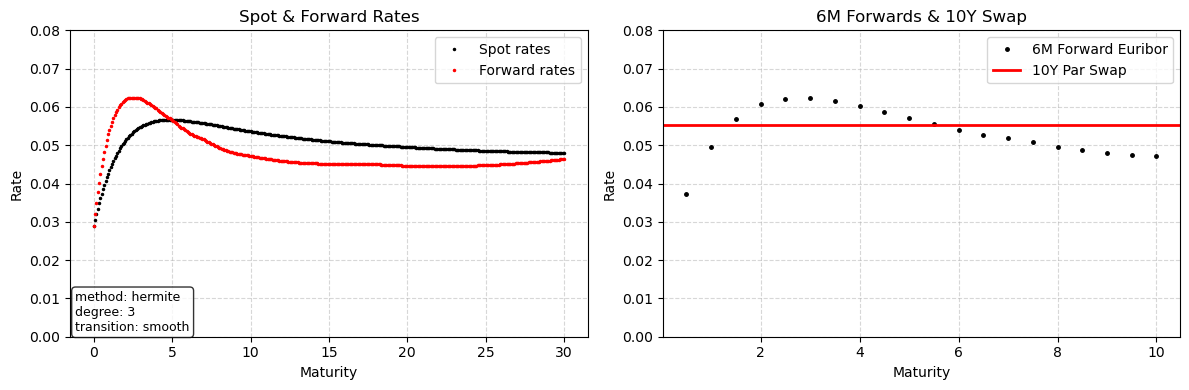

In [19]:
alpha_caplet = 0.5
N_caplet = 21
T_caplet = np.array([i*alpha_caplet for i in range(0,N_caplet)])
strike_caplet_market = 0.055
price_caplet_market = np.array([0, 0, 3.592, 19.2679, 32.1887, 37.2136, 36.475, 32.2678, 26.9031, 21.2176, 16.2022, 12.0628,
8.8952, 6.5191, 4.8435, 3.6485, 2.8098, 2.2067, 1.7814, 1.4707, 1.2443])
price_caplet_market = price_caplet_market/10000

K_swaption_offset = np.array([-300,-250,-200,-150,-100,-50,0,50,100,150,200,250,300])
iv_swaption_market = np.array([0.220675, 0.18331, 0.155103, 0.129001, 0.10812, 0.084411, 0.071866, 0.066535, 0.073942, 0.082751, 0.093605, 0.098971, 0.108909])

EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate":0.03772}]
fra_market = [{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12, "rate": 0.04026},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.04261},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.04477},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.04677},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.0486},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.05029},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.05183},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.05324},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.05452}]
swap_market = [{"id": 10,"instrument": "swap","maturity": 2, "rate": 0.05228, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate": 0.05602, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate": 0.05755, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate": 0.05791, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate": 0.05718, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.05539, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.05324, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.05205, "float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.05087, "float_freq": "semiannual", "fixed_freq": "annual","indices": []}]
data_zcb = EURIBOR_fixing + fra_market + swap_market

# Problem 1 - Computing the 10Y swap par swap rate
# 1a) Fitting the yield curve
mesh = 1/12
M = 360
interpolation_options = {"method":"hermite","degree":3,"transition": "smooth"}
T_fit, R_fit = fid.zcb_curve_fit(data_zcb,interpolation_options = interpolation_options)
T_inter = np.array([i*mesh for i in range(0,M+1)])
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_inter,T_fit,R_fit,interpolation_options = interpolation_options)
R_output = fid.for_values_in_list_find_value_return_value([0.5,1,2,5,10,15,20,30],T_inter,R_inter)
r0 = R_inter[0]
print(f"Problem 1a - 6M,1Y,2Y,5Y,10Y,15Y,20Y,30Y spot rates from the fit: {np.round(R_output,5)}")
# 1c) Computing the 10Y par swap rate
alpha_floating_leg = 0.5
T_10Y_swap = np.array([i*alpha_floating_leg for i in range(0,21)])
p_10Y_swap = fid.for_values_in_list_find_value_return_value(T_10Y_swap,T_inter,p_inter)
L_6M = fid.forward_rates_from_zcb_prices(T_10Y_swap,p_10Y_swap,horizon = 1)
R_10Y_swap, S_10Y_swap = fid.swap_rate_from_zcb_prices(0,0,10,"annual",T_10Y_swap,p_10Y_swap)
print(f"Problem 1c - 10Y par swap rate: {R_10Y_swap}")

#PLOTS FOR PROBLEM 1
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# --- Left: spot & forward rates ---
ax[0].plot(T_inter, R_inter, 'k.', ms=3, label="Spot rates")
ax[0].plot(T_inter, f_inter, 'r.', ms=3, label="Forward rates")
ax[0].set(title="Spot & Forward Rates", xlabel="Maturity", ylabel="Rate")
ax[0].set_ylim(0, 0.08)
ax[0].grid(True, ls='--', alpha=0.5)
ax[0].legend()

# Text box (fit info)
ax[0].text(
    0.01, 0.15,
    "method: hermite\ndegree: 3\ntransition: smooth",
    transform=ax[0].transAxes,
    fontsize=9,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
)

# --- Right: forwards & swap ---
ax[1].plot(T_10Y_swap[1:], L_6M[1:], 'k.', ms=5, label="6M Forward Euribor")
ax[1].axhline(R_10Y_swap, color='red', lw=2, label="10Y Par Swap")
ax[1].set(title="6M Forwards & 10Y Swap", xlabel="Maturity", ylabel="Rate")
ax[1].set_ylim(0, 0.08)
ax[1].grid(True, ls='--', alpha=0.5)
ax[1].legend()

plt.tight_layout()
plt.show()


# Problem 2 - Pricing the interest rate cap

In [30]:
# Problem 2 - Pricing the interest rate cap
def fit_hwev_caplet_prices(param,price,strike_observed,T,p,scaling = 1):
    a, sigma = param
    caplet_price_fit = fid.caplet_prices_hwev(strike_observed,a,sigma,T,p)
    M = len(price)
    sse = 0
    for m in range(0,M):
        sse += scaling*(price[m] - caplet_price_fit[m])**2
    return sse

In [31]:

# 2a) Fitting a Vasicek model to the yield curve
sigma_vasicek = 0.02
param_0 = 0.035, 6, 0.25
result = minimize(fid.fit_vasicek_sigma_fixed_obj,param_0,method = 'nelder-mead',args = (sigma_vasicek,R_inter,T_inter),options={'xatol': 1e-20,'disp': False})
r0_vasicek, a_vasicek, b_vasicek = result.x
print(f"Problem 2a - Vaseicek parameters: r0: {r0_vasicek}, a: {a_vasicek}, b: {b_vasicek}, sigma: {sigma_vasicek}, SSE: {result.fun}")
p_vasicek = fid.zcb_price_vasicek(r0_vasicek,a_vasicek,b_vasicek,sigma_vasicek,T_inter)
f_vasicek = fid.forward_rate_vasicek(r0_vasicek,a_vasicek,b_vasicek,sigma_vasicek,T_inter)
R_vasicek = fid.spot_rate_vasicek(r0_vasicek,a_vasicek,b_vasicek,sigma_vasicek,T_inter)


Problem 2a - Vaseicek parameters: r0: 0.024977946083671945, a: 5.574225555731182, b: 0.2885558485054699, sigma: 0.02, SSE: 0.0035706375190773863


In [33]:
# 2b) Fitting the HWEV model to caplet prices
param_0 = 2.5, 0.018
result = minimize(fit_hwev_caplet_prices,param_0,method = 'nelder-mead',args = (price_caplet_market,strike_caplet_market,T_10Y_swap,p_10Y_swap),options={'xatol': 1e-20,'disp': False})
a_hwev, sigma_hwev = result.x
print(f"Problem 2b - HWEV parameters: a: {a_hwev}, sigma: {sigma_hwev}, SSE: {result.fun}")
caplet_price_fit = fid.caplet_prices_hwev(strike_caplet_market,a_hwev,sigma_hwev,T_10Y_swap,p_10Y_swap)
sigma_market, sigma_fit = np.nan*np.ones(N_caplet), np.nan*np.ones(N_caplet)
for i in range(2,N_caplet):
    sigma_market[i] = fid.black_caplet_iv(price_caplet_market[i],T_10Y_swap[i],strike_caplet_market,0.5,p_10Y_swap[i],L_6M[i],type = "call",prec = 1e-10)
    sigma_fit[i] = fid.black_caplet_iv(caplet_price_fit[i],T_10Y_swap[i],strike_caplet_market,0.5,p_10Y_swap[i],L_6M[i],type = "call",prec = 1e-10)


TypeError: euro_option_price_hwev() got an unexpected keyword argument 'type'

In [ ]:

# 2c) - Simulated trajectories of the Vasick and HWEV models
size_ci = 0.95
M_simul, T_simul = 500, 10
mesh_simul = T_simul/M_simul
t_simul = np.array([i*mesh_simul for i in range(0,M_simul+1)])
r_simul_vasicek = fid.simul_vasicek(r0_vasicek,a_vasicek,b_vasicek,sigma_vasicek,M_simul,T_simul,method = "euler")
mean_vasicek = fid.mean_vasicek(r0_vasicek, a_vasicek, b_vasicek, sigma_vasicek,t_simul)
lb_vasicek, ub_vasicek = fid.ci_vasicek(r0_vasicek, a_vasicek, b_vasicek, sigma_vasicek,t_simul,size_ci,type_ci = "two_sided")
lb_sd_vasicek, ub_sd_vasicek = fid.ci_vasicek(r0_vasicek, a_vasicek, b_vasicek, sigma_vasicek,np.inf,size_ci,type_ci = "two_sided")
print(f"Problem 2c - Vasicek model 2-sided CI under the stationary distribution: {lb_sd_vasicek}, {ub_sd_vasicek}")
f_simul, f_T_simul = fid.interpolate(t_simul,T_inter,f_inter,interpolation_options)
theta_hwev = fid.theta_hwev(t_simul,f_simul,f_T_simul,a_hwev,sigma_hwev)
r_simul_hwev = fid.simul_hwev(r0,t_simul,theta_hwev,a_hwev,sigma_hwev,method = "euler")
mean_hwev, var_hwev = fid.mean_var_hwev(a_hwev,sigma_hwev,t_simul,f_simul,f_T_simul)
lb_hwev, ub_hwev = fid.ci_hwev(a_hwev,sigma_hwev,t_simul,f_simul,f_T_simul,size_ci,type_ci = "two_sided")
print(f"HWEV model 2-sided CI under the stationary distribution: {lb_hwev[-1]}, {ub_hwev[-1]}")

In [ ]:

# 2d) - Price of the interest cap
strike_cap = 0.06
caplet_price_cap = fid.caplet_prices_hwev(strike_cap,a_hwev,sigma_hwev,T_10Y_swap,p_10Y_swap)
caplet_price_report = []
for i in [2,4,8,12,16,20]:
    caplet_price_report.append(np.round(10000*caplet_price_cap[i],4))
price_cap = sum(caplet_price_cap[2:])
premium_cap = alpha_floating_leg*price_cap/S_10Y_swap
print(f"Problem 2d - Caplet prices for T=1,2,4,6,8,10: {caplet_price_report}")
print(f"Problem 2d - price_cap: {10000*price_cap}, premium_cap: {10000*premium_cap}")
